In [12]:
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters


In [13]:
df = pq.read_table(source='../CoverMyMeds_project/cmm_erdos_bootcamp_2020_timeseries.pq').to_pandas()

/Users/daniellaroberts/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



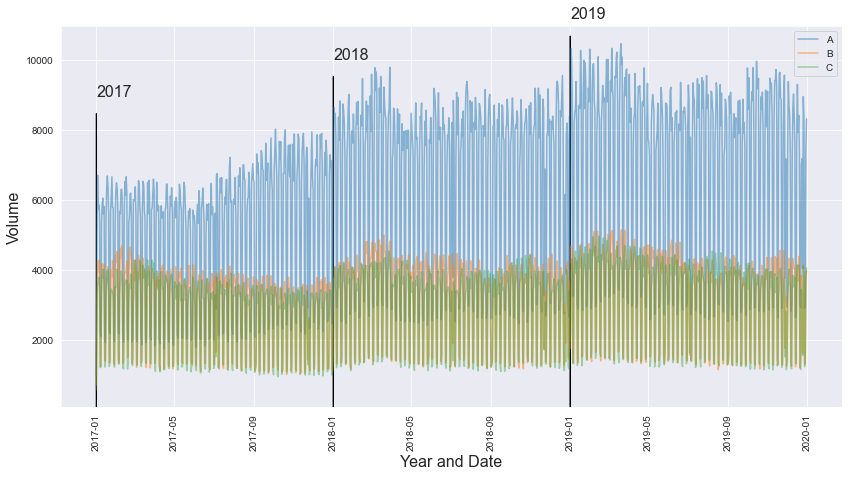

In [4]:
plt.figure(figsize=(14,7))


a = plt.plot(df['date_val'], df['volume_A'], label="A" ,alpha=0.5)
a = plt.plot(df['date_val'], df['volume_B'], label="B" ,alpha=0.5)
a = plt.plot(df['date_val'], df['volume_C'], label="C" ,alpha=0.4)

plt.xlabel("Year and Date", fontsize=16)
plt.ylabel("Volume", fontsize=16)

twenty17 = df['volume_A'][df['date_val'] == pd.Timestamp(2017,1,1)][0]
twenty18 = df['volume_A'][df['date_val'] == pd.Timestamp(2018,1,1)][365]
twenty19 = df['volume_A'][df['date_val'] == pd.Timestamp(2019,1,1)][730]

plt.text(pd.Timestamp(2017,1,1), twenty17+8000, "2017", fontsize=16)
plt.arrow(pd.Timestamp(2017,1,1), twenty17-1000, 0, 8500, width=0.1, shape='left', color="black")

plt.text(pd.Timestamp(2018,1,1), twenty18+7000, "2018", fontsize=16)
plt.arrow(pd.Timestamp(2018,1,1), twenty18-6000, 0, 12500, width=0.1, shape='left', color="black")

plt.text(pd.Timestamp(2019,1,1), twenty19+7000, "2019", fontsize=16)
plt.arrow(pd.Timestamp(2019,1,1), twenty19-6000, 0, 12500, width=0.1, shape='left', color="black")

plt.legend()

plt.xticks(rotation=90)

plt.savefig('all_data.png', dpi=400, pad_inches=0.1, bbox_inches='tight')

plt.show()




In [5]:
yes_corr = df[['volume_A', 'volume_B', 'volume_C', 'is_weekday', 'is_workday']].copy()

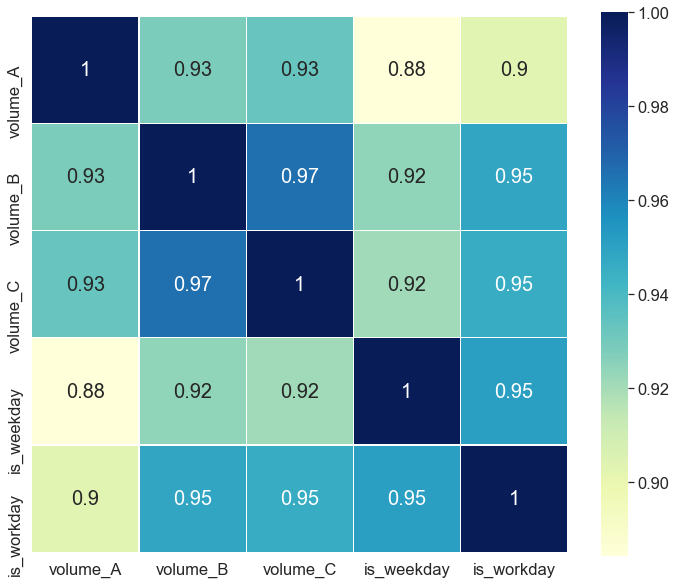

In [6]:
sns.set(font_scale=1.5)

yes_corr = df[['volume_A', 'volume_B', 'volume_C', 'is_weekday', 'is_workday']].copy()

plt.figure(figsize=(12,10))

corr = yes_corr.corr()
sns_plot = sns.heatmap(corr, annot=True, linewidth=0.1, square=True, 
                       cmap="YlGnBu", annot_kws={"size": 20})

plt.show()

sns_plot.figure.savefig('corr_yes.png', dpi=400, pad_inches=0.1, bbox_inches='tight')




In [7]:
no_corr = df[['volume_A', 'volume_B', 'volume_C', 'day_of_week', 'calendar_day', 'calendar_month']].copy()

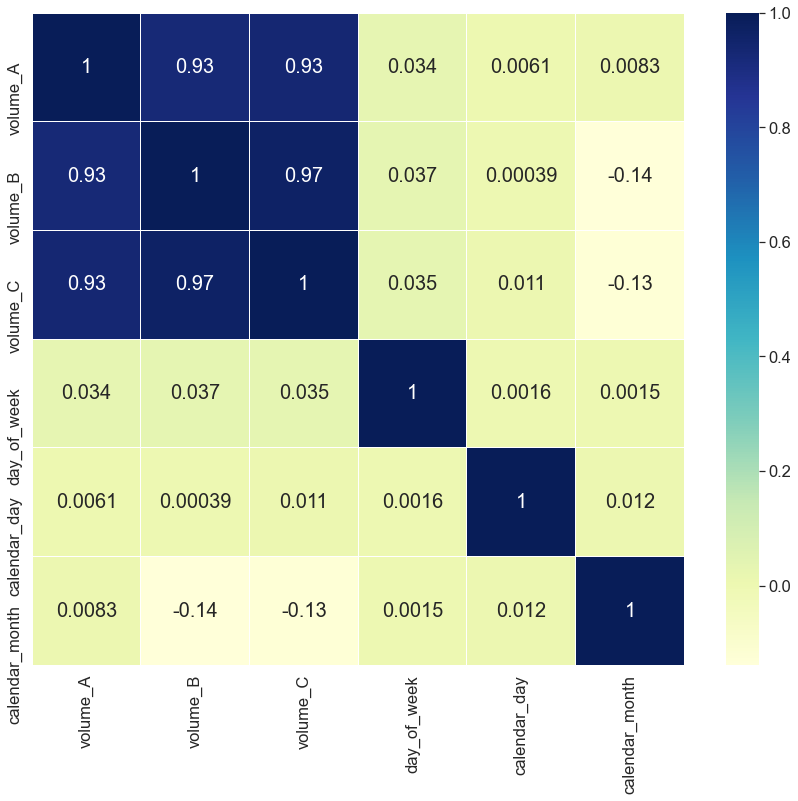

In [8]:
sns.set(font_scale=1.5)

plt.figure(figsize=(15,12))

corr = no_corr.corr()
sns_plot = sns.heatmap(corr, annot=True, linewidth=0.1, square=True, 
                       cmap="YlGnBu", annot_kws={"size": 20})

plt.show()

sns_plot.figure.savefig('corr_no.png', dpi=400, pad_inches=0.1, bbox_inches='tight')





In [9]:
df_weekday_only = df[df['is_weekday'] == 1]

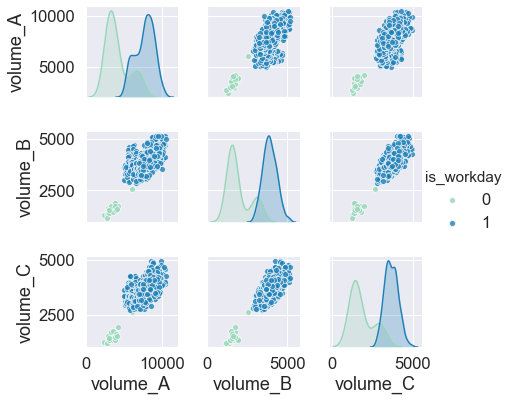

In [10]:
sns_p2 = sns.pairplot(df_weekday_only, x_vars = ['volume_A', 'volume_B', 'volume_C'],
            y_vars = ['volume_A', 'volume_B', 'volume_C'],
            hue = 'is_workday',
            kind = 'scatter',
            palette = 'YlGnBu',
            height = 2,
            plot_kws={'s':35, 'alpha':0.8})

#sns_p2.savefig('pairsplot2.png', dpi=400)